<a href="https://colab.research.google.com/github/ssravali/Research-1/blob/master/cnn6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Libraries initiated
import numpy as np
import pickle
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import logging
from time import time
import pandas as pd
from keras.layers import Flatten
from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from keras.layers import Conv1D, Dropout
from keras.layers import MaxPooling1D
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import scipy.io as sio
import keras
import random
print("Imported libraries")

Using TensorFlow backend.


Imported libraries


In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
test_y = np.array(mat_contents['test_y'])

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy2.mat')
train_y = np.array(mat_contents['train_y'])

classes = np.unique(train_y)
nClasses = len(classes)

x_val = []
y_val = []

for i in classes:
    #print("i is: ",i)
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    
    r, r1 = np.where(test_y == i)
    while(o < r.shape[0]):
        y_val.append(test_y[r[j]])
        y_val.append(test_y[r[k]])
        y_val.append(test_y[r[l]])
        y_val.append(test_y[r[m]])
        y_val.append(test_y[r[n]])
        y_val.append(test_y[r[o]])
        x_val.append(test_x[r[j]])
        x_val.append(test_x[r[k]])
        x_val.append(test_x[r[l]])
        x_val.append(test_x[r[m]])
        x_val.append(test_x[r[n]])
        x_val.append(test_x[r[o]])
        
        j = j + 12
        k = k + 12
        l = l + 12
        m = m + 12
        n = n + 12
        o = o + 12

val_x = np.array(x_val)
val_y = np.array(y_val)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(train_y)
test_y = enc.fit_transform(test_y)
val_y = enc.fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")

Train_y one hot: (960, 10)
Test_y one hot: (240, 10)
Val_y one hot: (120, 10)
(960, 800, 10)
(240, 800, 10)
(120, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 960 samples, validate on 120 samples
Epoch 1/1000
 - 1s - loss: 14.1998 - acc: 0.0927 - mean_absolute_error: 0.1811 - val_loss: 8.5592 - val_acc: 0.0750 - val_mean_absolute_error: 0.1834
Epoch 2/1000
 - 1s - loss: 14.0355 - acc: 0.0896 - mean_absolute_error: 0.1820 - val_loss: 8.2841 - val_acc: 0.0833 - val_mean_absolute_error: 0.1834
Epoch 3/1000
 - 1s - loss: 13.2690 - acc: 0.1240 - mean_absolute_error: 0.1750 - val_loss: 7.8613 - val_acc: 0.1083 - val_mean_absolute_error: 0.1800
Epoch 4/1000
 - 1s - loss: 12.9615 - acc: 0.1333 - mean_absolute_error: 0.1739 - val_loss: 7.6995 - val_acc: 0.1083 - val_mean_absolute_error: 0.1793
Epoch 5/1000
 - 1s - loss: 12.1682 - acc: 0.1594 - mean_absolute_error: 0.1683 - val_loss: 7.3504 - val_acc: 0.0917 - val_mean_absolute_error: 0.1790
Epoch 6/1000
 - 1s - loss: 10.9714 - acc: 0.1563 - mean_absolute_error: 0.1679 - val_loss: 5.8836 - val_acc: 0.1250 - val_mean_absolute_error: 0.1770
Epoch 7/1000
 - 1s - loss: 5.6192 - acc: 0.1375 - mean

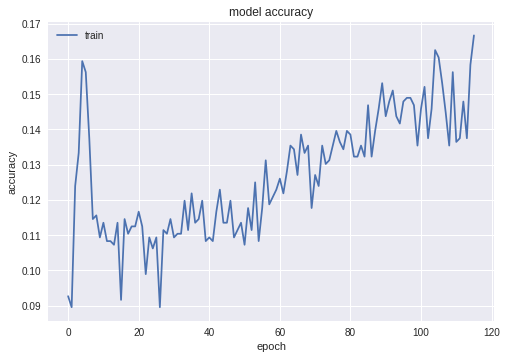

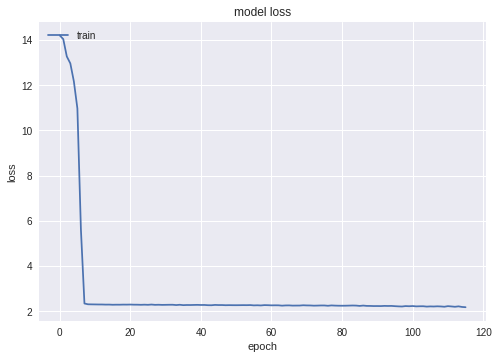

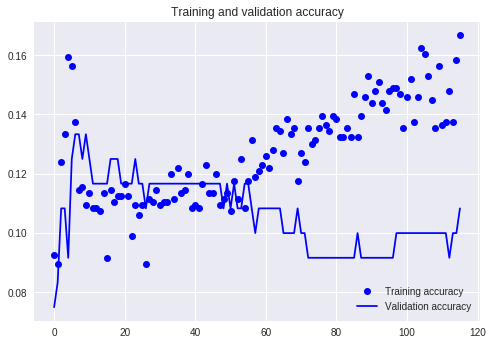

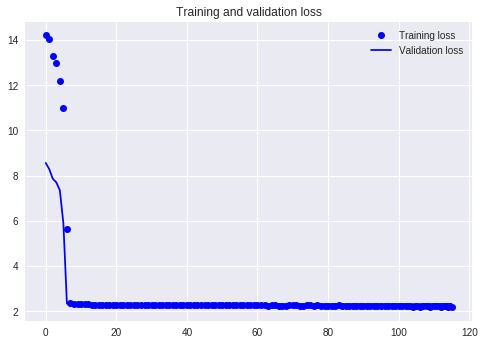

240/240 [==============================] - 0s 511us/step
Test loss: 2.30074028968811
Test accuracy: 0.1125
(240, 10)
[[ 0  0  0  0  1  0  1  0  0 22]
 [ 3  1  0  1  0  0  0  0  0 19]
 [ 1  1  0  0  0  0  0  0  0 22]
 [ 0  0  0  0  0  0  0  0  0 24]
 [ 1  0  0  0  0  0  0  0  0 23]
 [ 2  0  0  0  0  1  0  0  0 21]
 [ 2  0  0  0  0  0  1  0  0 21]
 [ 0  0  0  0  0  0  0  0  0 24]
 [ 1  0  0  0  0  1  0  0  1 21]
 [ 1  0  0  0  0  0  0  0  0 23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.50      0.04      0.08        24
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        24
           5       0.50      0.04      0.08        24
           6       0.50      0.04      0.08        24
           7       0.00      0.00      0.00        24
           8       1.00      0.04      0.08        24
           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


NameError: ignored

In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



(240, 1)
(240, 1)


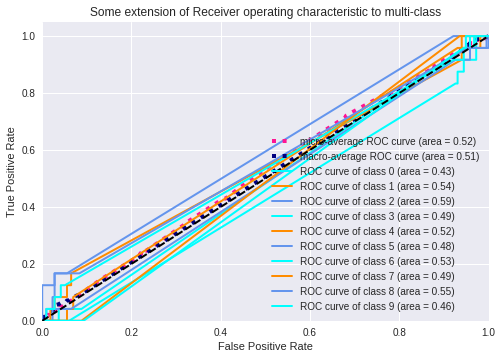

In [0]:
print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
testx = np.array(mat_contents['test_x'])
#print(testx.shape)
test_x = testx[0:120]
#val_x = np.concatenate(( testx[0:60],testx[120:180]),axis = 0)
#print(val_x.shape)
#print("loaded testx")

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])
test_y = testy[0:120]
#print("Loaded testy")
#print(test_y)
#val_y = np.concatenate(( testy[0:60],testy[120:180]),axis = 0)
#a_train, val_x1, b_train, val_y1 = train_test_split(test_x, test_y, test_size=0.5)

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])
#print("loadded trainx")

mat_contents = sio.loadmat('augtrainy2.mat')
trainy = np.array(mat_contents['train_y'])
#print("loaded trainy")
#a_train, val_x2, b_train, val_y2 = train_test_split(train_x, trainy, test_size=0.3)
#val_x = np.concatenate((val_x1,val_x2), axis = 0)
#print(val_y1.shape)
#print(val_y2.shape)
classes = np.unique(trainy)
nClasses = len(classes)

val_x1 = []
val_x2 = []
val_y1 = []
val_y2 = []

for i in range(nClasses):
    #print("Class: ", i)
    j = 2
    r,r1 = np.where(trainy == i)
    while(j <= (r.shape[0]/2)):
        val_x2.append(train_x[r[j]])
        val_y2.append(trainy[r[j]])
        j = j + 3
    r,r1 = np.where(test_y == i)
    j = 2
    k = 5
    R = []
    while(k <= r.shape[0]):
        val_x1.append(test_x[r[j]])
        val_y1.append(test_y[r[j]])
        R.append(r[k])
        j = j + 6
        k = k + 6
    #print(len(R))
    train_x = np.concatenate((train_x, test_x[R]),axis= 0)
    trainy = np.concatenate((trainy,testy[R]), axis = 0)

val_x1 = np.array(val_x1)
val_x2 = np.array(val_x2)
val_y1 = np.array(val_y1, dtype = int)
val_y2 = np.array(val_y2, dtype = int)
val_x = np.concatenate((val_x1,val_x2), axis = 0)
val_y = np.concatenate((val_y1,val_y2), axis = 0)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(trainy)
test_y = enc.fit_transform(test_y)
val_y = enc.fit_transform(val_y)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")


Train_y one hot: (980, 10)
Test_y one hot: (120, 10)
Val_y one hot: (180, 10)
(980, 800, 10)
(120, 800, 10)
(180, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(32, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(3)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.001),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(ytest.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



Train on 960 samples, validate on 120 samples
Epoch 1/1000
 - 5s - loss: 12.1340 - acc: 0.1250 - mean_absolute_error: 0.1748 - val_loss: 7.1589 - val_acc: 0.1167 - val_mean_absolute_error: 0.1761
Epoch 2/1000
 - 2s - loss: 9.7851 - acc: 0.2688 - mean_absolute_error: 0.1467 - val_loss: 6.6148 - val_acc: 0.1583 - val_mean_absolute_error: 0.1681
Epoch 3/1000
 - 3s - loss: 8.6849 - acc: 0.3771 - mean_absolute_error: 0.1259 - val_loss: 7.0578 - val_acc: 0.1333 - val_mean_absolute_error: 0.1729
Epoch 4/1000
 - 3s - loss: 7.8571 - acc: 0.4240 - mean_absolute_error: 0.1151 - val_loss: 6.5413 - val_acc: 0.1667 - val_mean_absolute_error: 0.1674
Epoch 5/1000
 - 3s - loss: 7.4166 - acc: 0.4719 - mean_absolute_error: 0.1057 - val_loss: 5.9830 - val_acc: 0.2167 - val_mean_absolute_error: 0.1584
Epoch 6/1000
 - 3s - loss: 6.9579 - acc: 0.5208 - mean_absolute_error: 0.0971 - val_loss: 5.7487 - val_acc: 0.2083 - val_mean_absolute_error: 0.1576
Epoch 7/1000
 - 3s - loss: 6.5843 - acc: 0.5594 - mean_abso

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
test_y = np.array(mat_contents['test_y'])

mat_contents = sio.loadmat('augtrainx2.mat')
train_x = np.array(mat_contents['train_x'])

mat_contents = sio.loadmat('augtrainy2.mat')
train_y = np.array(mat_contents['train_y'])

classes = np.unique(train_y)
nClasses = len(classes)

x_train = []
y_train = []
x_test = []
y_test = []
x_val = []
y_val = []
for i in classes:
    #print("i is: ",i)
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    r, r1 = np.where(train_y == i)
    while(o < r.shape[0]):
        x_train.append(train_x[r[j]])
        x_train.append(train_x[r[k]])
        x_train.append(train_x[r[l]])
        x_train.append(train_x[r[m]])
        x_test.append(train_x[r[n]])
        x_val.append(train_x[r[o]])
        #x_test.append(train_x[r[o]])
        y_train.append(train_y[r[j]])
        y_train.append(train_y[r[k]])
        y_train.append(train_y[r[l]])
        y_train.append(train_y[r[m]])
        y_test.append(train_y[r[n]])
        y_val.append(train_y[r[o]])
        #y_test.append(train_y[r[o]])
        j = j + 6
        k = k + 6
        l = l + 6
        m = m + 6
        n = n + 6
        o = o + 6
    #print("len of y_test:",len(y_test))
    #print("len y_train: ",len(y_train))
    #print("len y_val: ",len(y_val))
    j = 0
    k = 1
    l = 2
    m = 3
    n = 4
    o = 5
    r, r1 = np.where(test_y == i)
    while(o < r.shape[0]):
        x_train.append(test_x[r[j]])
        x_train.append(test_x[r[k]])
        x_train.append(test_x[r[l]])
        x_train.append(test_x[r[m]])
        x_test.append(test_x[r[n]])
        x_val.append(test_x[r[o]])
        #x_test.append(train_x[r[o]])
        y_train.append(test_y[r[j]])
        y_train.append(test_y[r[k]])
        y_train.append(test_y[r[l]])
        y_train.append(test_y[r[m]])
        y_test.append(test_y[r[n]])
        y_val.append(test_y[r[o]])
        #y_test.append(train_y[r[o]])
        j = j + 6
        k = k + 6
        l = l + 6
        m = m + 6
        n = n + 6
        o = o + 6
    #print("len of y_test:",len(y_test))
    #print("len y_train: ",len(y_train))
    #print("len y_val: ",len(y_val))
    
    

train_x = np.array(x_train)
y_train = np.array(y_train)
test_x = np.array(x_test)
y_test = np.array(y_test)
val_x = np.array(x_val)
y_val = np.array(y_val)

enc = OneHotEncoder(sparse=False,categories='auto')
train_y = enc.fit_transform(y_train)
test_y = enc.fit_transform(y_test)
val_y = enc.fit_transform(y_val)

print("Train_y one hot:", train_y.shape)
print("Test_y one hot:", test_y.shape)
print("Val_y one hot:", val_y.shape)


#train_x = train_x.reshape(400,2800,10,1)
#test_x = test_x.reshape(200,2800,10,1)
print(train_x.shape)
print(test_x.shape)
print(val_x.shape)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("loaded data")



Train_y one hot: (800, 10)
Test_y one hot: (200, 10)
Val_y one hot: (200, 10)
(800, 800, 10)
(200, 800, 10)
(200, 800, 10)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
loaded data


Train on 980 samples, validate on 180 samples
Epoch 1/1000
 - 1s - loss: 2.2265 - acc: 0.8192 - mean_absolute_error: 0.1817 - val_loss: 1.8256 - val_acc: 0.8261 - val_mean_absolute_error: 0.1780
Epoch 2/1000
 - 1s - loss: 2.1201 - acc: 0.8236 - mean_absolute_error: 0.1777 - val_loss: 1.6954 - val_acc: 0.8306 - val_mean_absolute_error: 0.1730
Epoch 3/1000
 - 1s - loss: 2.1163 - acc: 0.8228 - mean_absolute_error: 0.1783 - val_loss: 1.5397 - val_acc: 0.8306 - val_mean_absolute_error: 0.1732
Epoch 4/1000
 - 1s - loss: 2.0782 - acc: 0.8228 - mean_absolute_error: 0.1783 - val_loss: 1.5674 - val_acc: 0.8261 - val_mean_absolute_error: 0.1754
Epoch 5/1000
 - 1s - loss: 2.0156 - acc: 0.8236 - mean_absolute_error: 0.1777 - val_loss: 1.4804 - val_acc: 0.8350 - val_mean_absolute_error: 0.1706
Epoch 6/1000
 - 1s - loss: 1.9315 - acc: 0.8237 - mean_absolute_error: 0.1775 - val_loss: 1.3758 - val_acc: 0.8372 - val_mean_absolute_error: 0.1675
Epoch 7/1000
 - 1s - loss: 1.8092 - acc: 0.8246 - mean_absol

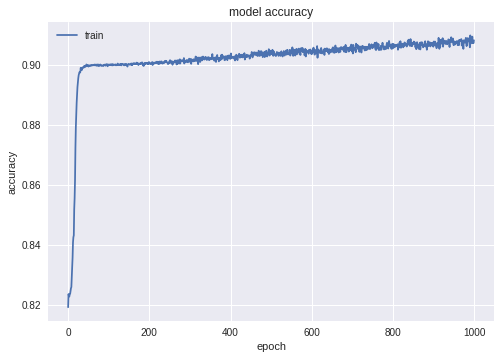

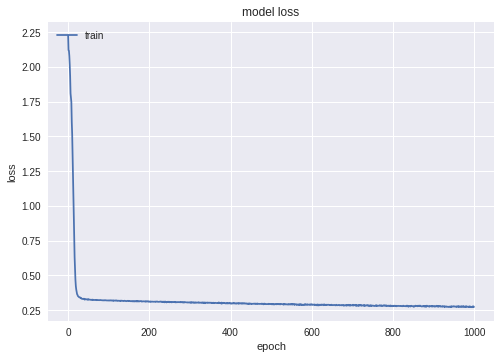

120/120 [==============================] - 0s 564us/step
Test loss: 0.32484468817710876
Test accuracy: 0.8974999785423279


In [0]:
model = Sequential()
model.add(Conv1D(10, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(Conv1D(5, kernel_size=(3), activation='relu', 
                 data_format="channels_last"))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=0.001, momentum=0.8, decay=0.0005),
              metrics=['accuracy', 'mae'])
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0.001, patience=100, 
                           verbose=0, mode='auto', baseline=None, 
                           restore_best_weights=True)]
history = model.fit(train_x, train_y,batch_size=100,epochs=1000,verbose=2,
                    validation_data = (val_x, val_y), callbacks=callbacks)
model.summary()
print("Model Created") 

#plotting training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#testing
score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

print(testy.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [0]:
pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)
cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

(200, 10)
[[3 1 9 0 2 0 2 2 0 1]
 [2 0 4 4 0 2 4 2 0 2]
 [1 2 4 0 0 0 2 4 0 7]
 [1 5 4 0 4 2 2 0 1 1]
 [1 0 4 0 0 4 0 4 6 1]
 [4 2 2 1 2 0 2 0 4 3]
 [4 2 4 0 0 4 2 0 2 2]
 [5 0 4 1 4 0 0 4 2 0]
 [3 0 7 0 3 4 0 0 3 0]
 [4 0 2 3 0 0 0 5 3 3]]
              precision    recall  f1-score   support

           0       0.11      0.15      0.12        20
           1       0.00      0.00      0.00        20
           2       0.09      0.20      0.13        20
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.14      0.10      0.12        20
           7       0.19      0.20      0.20        20
           8       0.14      0.15      0.15        20
           9       0.15      0.15      0.15        20

   micro avg       0.10      0.10      0.10       200
   macro avg       0.08      0.10      0.09       200
weighted avg       0.08      0.10      0.09       200



In [0]:
pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
cm = confusion_matrix(testy[0:120], predy)
print(cm)
print(classification_report(testy[0:120], predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

(120, 10)
[[2 1 1 1 2 0 1 1 1 2]
 [0 5 1 0 0 2 1 0 0 3]
 [2 0 6 0 0 0 1 1 1 1]
 [1 2 1 4 0 1 0 0 0 3]
 [1 0 0 0 8 0 1 1 0 1]
 [0 2 0 0 0 9 1 0 0 0]
 [1 0 0 3 0 5 1 1 0 1]
 [1 0 0 1 1 0 2 2 5 0]
 [2 0 3 0 1 0 2 1 2 1]
 [1 0 0 3 0 0 2 1 0 5]]
              precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       0.50      0.42      0.45        12
           2       0.50      0.50      0.50        12
           3       0.33      0.33      0.33        12
           4       0.67      0.67      0.67        12
           5       0.53      0.75      0.62        12
           6       0.08      0.08      0.08        12
           7       0.25      0.17      0.20        12
           8       0.22      0.17      0.19        12
           9       0.29      0.42      0.34        12

   micro avg       0.37      0.37      0.37       120
   macro avg       0.36      0.37      0.36       120
weighted avg       0.36      0.37      0.36       120



In [0]:
pred_y = model.predict(test_x)
print(pred_y.shape)
predy = enc.inverse_transform(pred_y)
ytest = enc.inverse_transform(test_y)

cm = confusion_matrix(ytest, predy)
print(cm)
print(classification_report(ytest, predy))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("The accuracy per activity is : ",cm.diagonal())

(120, 10)
[[ 5  0  0  0  0  0  5  0  2  0]
 [ 0  6  0  1  2  3  0  0  0  0]
 [ 0  0  5  0  0  0  3  2  2  0]
 [ 1  0  1  4  0  2  0  0  0  4]
 [ 1  0  0  0  5  0  0  2  2  2]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 2  0  1  0  0  0  7  0  0  2]
 [ 1  0  0  0  1  0  0  9  0  1]
 [ 0  0  1  1  0  0  2  1  7  0]
 [ 1  0  1  4  0  1  3  0  0  2]]
              precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       1.00      0.50      0.67        12
           2       0.56      0.42      0.48        12
           3       0.40      0.33      0.36        12
           4       0.62      0.42      0.50        12
           5       0.67      1.00      0.80        12
           6       0.35      0.58      0.44        12
           7       0.64      0.75      0.69        12
           8       0.54      0.58      0.56        12
           9       0.18      0.17      0.17        12

   micro avg       0.52      0.52      0.52       120
   macro 

In [0]:
mat_contents = sio.loadmat('augtestx2.mat')
test_x = np.array(mat_contents['test_x'])

mat_contents = sio.loadmat('augtesty2.mat')
testy = np.array(mat_contents['test_y'])

test_y = OneHotEncoder(sparse=False,categories='auto').fit_transform(testy)

print("Test_y one hot:", test_y.shape)
print(test_x.shape)

score = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

pred_y = model.predict(test_x)
print(pred_y.shape)
predy = np.argmax(pred_y, axis=1).T
print(confusion_matrix(testy, predy))
print(classification_report(testy, predy))

Test_y one hot: (240, 10)
(240, 800, 10)
240/240 [==============================] - 0s 506us/step
Test loss: 0.3447908858458201
Test accuracy: 0.9070833047231038
(240, 10)
[[17  0  0  0  0  0  5  0  2  0]
 [12  6  0  1  2  3  0  0  0  0]
 [12  0  5  0  0  0  3  2  2  0]
 [13  0  1  4  0  2  0  0  0  4]
 [13  0  0  0  5  0  0  2  2  2]
 [12  0  0  0  0 12  0  0  0  0]
 [14  0  1  0  0  0  7  0  0  2]
 [13  0  0  0  1  0  0  9  0  1]
 [12  0  1  1  0  0  2  1  7  0]
 [13  0  1  4  0  1  3  0  0  2]]
              precision    recall  f1-score   support

           0       0.13      0.71      0.22        24
           1       1.00      0.25      0.40        24
           2       0.56      0.21      0.30        24
           3       0.40      0.17      0.24        24
           4       0.62      0.21      0.31        24
           5       0.67      0.50      0.57        24
           6       0.35      0.29      0.32        24
           7       0.64      0.38      0.47        24
          

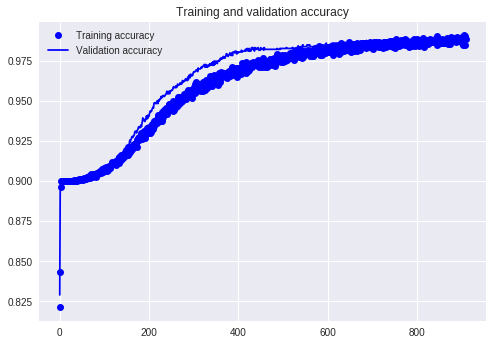

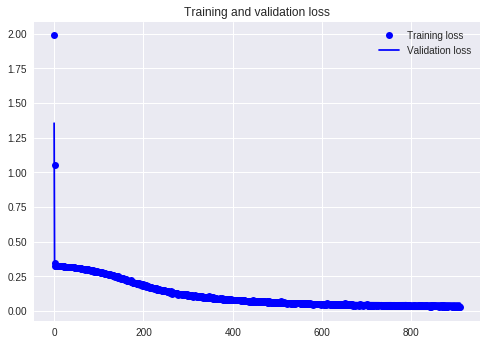

In [0]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(240, 1)
(240,)


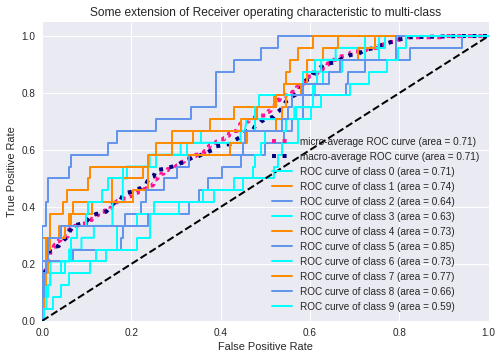

In [0]:
print(testy.shape)
print(predy.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw = 2

y_score = pred_y
y_test = test_y
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nClasses):
    #x = np.where(y_test == i)[0]
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(nClasses)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(nClasses):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= nClasses

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(nClasses), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()